In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv(r"C:\Users\reyha\Desktop\data science class\bank.csv")

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [6]:
data.shape

(11162, 17)

In [7]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [9]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

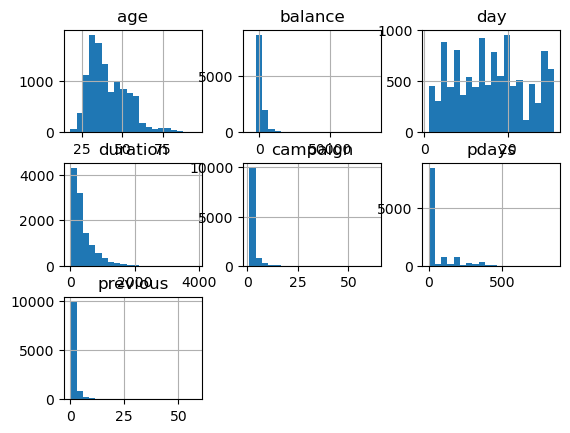

In [10]:
data.hist(bins=20)

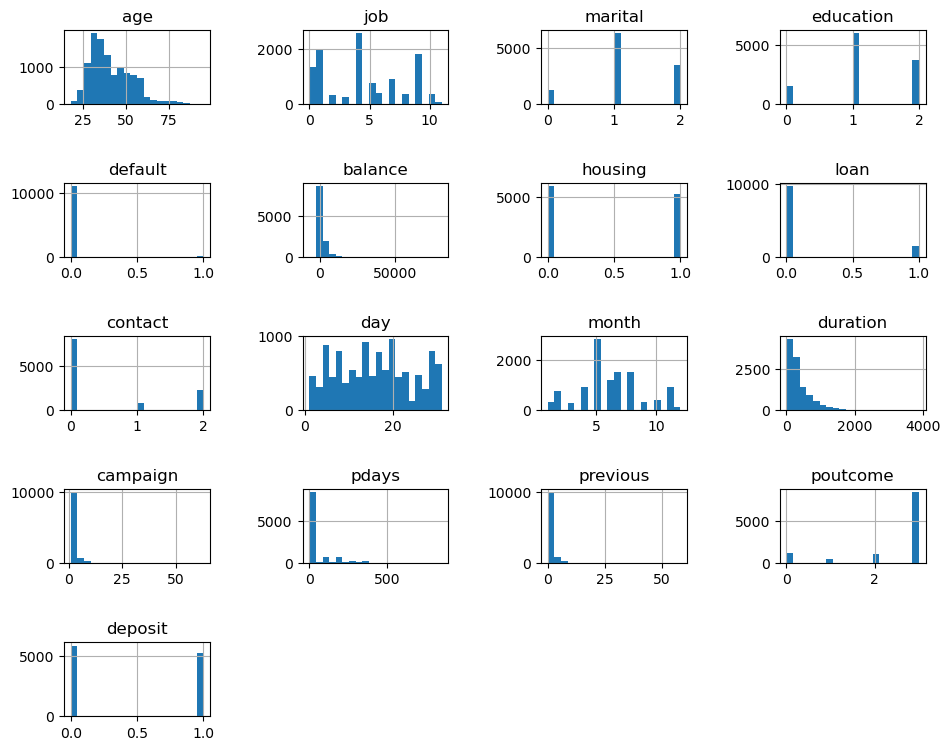

In [63]:
data.hist(bins=20, figsize=(10, 8))
plt.tight_layout(pad=2.5)
plt.show()

In [11]:
(data["pdays"] < 0).any()

True

In [12]:
(data["previous"] < 0).any()

False

In [13]:
data['job'].unique() 

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [14]:
data['job'].value_counts()


management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder,LabelBinarizer

In [16]:


le = LabelEncoder()
data['job'] = le.fit_transform(data['job'])


In [17]:
data['marital'].unique() 

array(['married', 'single', 'divorced'], dtype=object)

In [18]:
data['marital'] = le.fit_transform(data['marital'])

In [19]:
 data['education'].unique() 

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

In [20]:
data['education'].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [21]:

data['education'] = data['education'].replace('unknown', np.nan)


In [22]:
mode_sec = data['education'].mode()[0]
data['education'].fillna(mode_sec, inplace=True)


In [23]:
mapping = {'primary':0, 'secondary':1, 'tertiary':2}
data['education'] = data['education'].map(mapping)


In [24]:
data['education'].isna().sum()

0

In [25]:
data['education'].unique()

array([1, 2, 0], dtype=int64)

In [26]:
lb=LabelBinarizer()
data["default"]=lb.fit_transform(data["default"])

In [27]:
data["default"].unique()

array([0, 1])

In [28]:
data["housing"]=lb.fit_transform(data["housing"])

In [29]:
data["housing"].unique()

array([1, 0])

In [30]:
data["loan"]=lb.fit_transform(data["loan"])

In [31]:
data["loan"].unique()

array([0, 1])

In [32]:
data["contact"].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [33]:
data["contact"]=le.fit_transform(data["contact"])

In [34]:
data["contact"].unique()

array([2, 0, 1])

In [35]:
data["month"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [36]:
mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct':10, 'nov':11, 'dec':12
}
data['month'] = data['month'].map(mapping)


In [37]:
data["poutcome"]=le.fit_transform(data["poutcome"])

In [38]:
data["poutcome"].unique()

array([3, 1, 0, 2])

In [39]:
data["deposit"]=lb.fit_transform(data["deposit"])

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [41]:
x=data.drop(columns=["deposit","duration"])

In [42]:
y=data["deposit"]

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1234)
x_val,x_test,y_val,y_test=train_test_split(x_test,y_test,test_size=0.5,random_state=1234)

In [44]:
x.shape

(11162, 15)

In [45]:
param_dist = {
    'n_estimators':    [15,100, 300, 500, 1000,10000],     
    'max_depth':       [ 10, 15,7,22],        
    'max_features':    [ 2, 4, 6],      
    'min_samples_split':[2, 5, 7, 9],                
    'min_samples_leaf': [1, 2, 4, 7],                                   
    'max_samples':     [ 0.2, 0.3, 0.5],          
    'class_weight':    ['balanced',"balanced_subsample"],
    'criterion':        ['gini', 'entropy'],
    "bootstrap":        ["True","False"] 
}


In [46]:
from sklearn.model_selection import RandomizedSearchCV

rfc = RandomForestClassifier(oob_score=True, random_state=1234)

search = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param_dist,
    n_iter=7, 
    cv=5,                           
    verbose=2,
    random_state=1234
)

search.fit(x_train, y_train)

print("بهترین پارامترها:", search.best_params_)
print("بهترین امتیاز CV:", search.best_score_)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=22, max_features=6, max_samples=0.2, min_samples_leaf=7, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=22, max_features=6, max_samples=0.2, min_samples_leaf=7, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=22, max_features=6, max_samples=0.2, min_samples_leaf=7, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=22, max_features=6, max_samples=0.2, min_samples_leaf=7, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=22, max_features=6, max_samples=0.2, min

In [47]:
rfc=RandomForestClassifier(n_estimators= 300, min_samples_split= 9, min_samples_leaf=1,max_features= 6,max_depth= 22 ,max_samples= 0.2,criterion='entropy',class_weight='balanced',bootstrap= True,random_state=1234)
rfc.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=22, max_features=6, max_samples=0.2,
                       min_samples_split=9, n_estimators=300,
                       random_state=1234)

In [48]:
rfc.score(x_train,y_train)

0.798796876999872

In [49]:
rfc.score(x_val,y_val)

0.7240143369175627

[Text(0.5, 0.9, 'pdays <= 43.0\nentropy = 0.998\nsamples = 1427\nvalue = [817.838, 740.815]\nclass = Yes'),
 Text(0.25, 0.7, 'housing <= 0.5\nentropy = 0.972\nsamples = 1074\nvalue = [694.783, 467.381]\nclass = Yes'),
 Text(0.125, 0.5, 'month <= 8.5\nentropy = 1.0\nsamples = 559\nvalue = [314.262, 298.87]\nclass = Yes'),
 Text(0.0625, 0.3, 'age <= 25.5\nentropy = 0.991\nsamples = 471\nvalue = [284.918, 226.802]\nclass = Yes'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'balance <= 9565.5\nentropy = 0.868\nsamples = 88\nvalue = [29.344, 72.068]\nclass = No'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'balance <= 225.5\nentropy = 0.89\nsamples = 515\nvalue = [380.522, 168.512]\nclass = Yes'),
 Text(0.3125, 0.3, 'day <= 3.5\nentropy = 0.718\nsamples = 187\nvalue = [154.291, 38.154]\nclass = Yes'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 

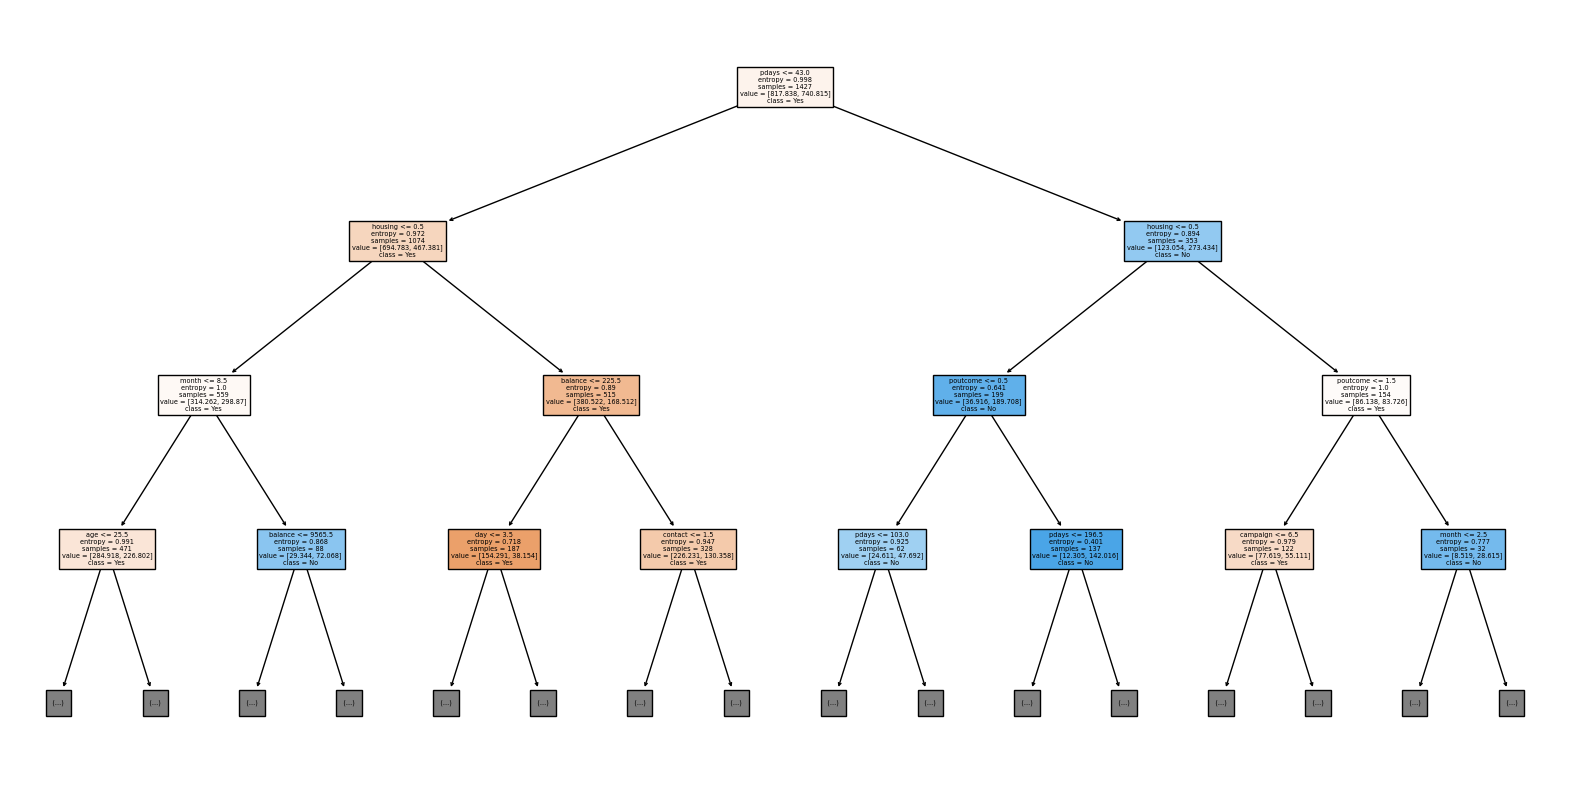

In [50]:
from sklearn.tree import plot_tree
estimator=rfc.estimators_[0]
plt.figure(figsize=(20,10))
plot_tree(
    estimator,
    feature_names=x_train.columns,
    class_names=["Yes","No"],
    filled=True,
    max_depth=3
)

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
rfc.score(x_test,y_test)

0.7367164179104477

In [53]:
y_pred = rfc.predict(x_test)

In [54]:
print(classification_report(y_test, y_pred, target_names=['no','yes']))

              precision    recall  f1-score   support

          no       0.72      0.83      0.77       878
         yes       0.77      0.64      0.70       797

    accuracy                           0.74      1675
   macro avg       0.74      0.73      0.73      1675
weighted avg       0.74      0.74      0.73      1675



     feature  importance
5    balance    0.176652
0        age    0.150742
9        day    0.128958
10     month    0.097796
1        job    0.066299
11  campaign    0.065613
12     pdays    0.063466
8    contact    0.060592
14  poutcome    0.049182
6    housing    0.034862


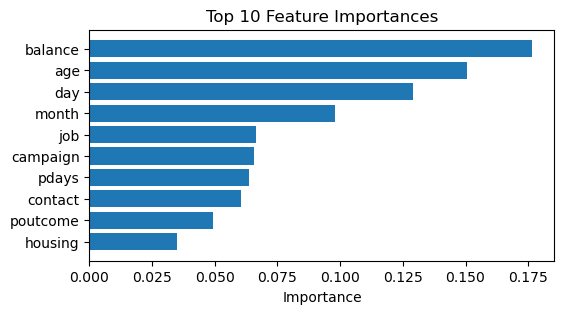

In [65]:
import pandas as pd
import matplotlib.pyplot as plt


importances = rfc.feature_importances_
feat_names  = x_train.columns


df_imp = pd.DataFrame({
    'feature': feat_names,
    'importance': importances
}).sort_values('importance', ascending=False)


print(df_imp.head(10))


plt.figure(figsize=(6, 3))
plt.barh(df_imp['feature'].head(10), df_imp['importance'].head(10))
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.show()
